In [30]:
import numpy as np
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

### file directory

In [32]:
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

#train file
train_file = os.path.join(root_dir, "data", "train.csv")

#model file
model_file = os.path.join(root_dir,"model", "prediction_model.pkl")

## read csv data distribution on the training

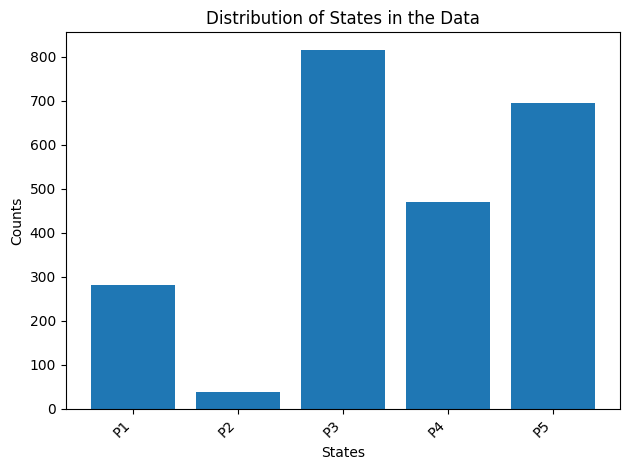

In [33]:
#read the csv data
try:
    data = pd.read_csv(train_file,delimiter=';')
    X = data[['lat[deg]', 'lon[deg]','sog[kn]']]
    y = data['STATE']

    # Get the unique states and their counts
    states, counts = np.unique(y, return_counts=True)

    # Create the bar chart
    plt.bar(states, counts)

    # Customize the chart
    plt.xlabel("States")
    plt.ylabel("Counts")
    plt.title("Distribution of States in the Data")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout for better spacing

    # Display the chart
    plt.show()
except:
    print('data not found')

## training function
### i use 80/20 distribution due to the small amout of data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
joblib.dump(model, model_file)

['c:\\Users\\abinp\\Documents\\ITS\\semester 8\\commision\\AIS-Data-Process\\model\\prediction_model.pkl']

In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(X_test)
print(y_pred)
print('model accuracy score:',accuracy) 


      lat[deg]    lon[deg]  sog[kn]
1085 -7.181158  112.685945      4.2
2296 -6.662225  112.652965     15.4
208  -6.784505  112.745317     10.3
1178 -7.187602  112.689097      0.0
282  -6.832227  112.745740      2.8
...        ...         ...      ...
1159 -7.187627  112.689142      0.1
1422 -7.187603  112.689122      0.0
857  -7.101837  112.658368     14.4
1619 -7.186090  112.689685      2.1
360  -6.848117  112.744963      4.4

[460 rows x 3 columns]
['P3' 'P5' 'P1' 'P4' 'P2' 'P3' 'P3' 'P4' 'P1' 'P5' 'P5' 'P3' 'P3' 'P3'
 'P4' 'P4' 'P3' 'P5' 'P5' 'P5' 'P3' 'P4' 'P5' 'P3' 'P3' 'P4' 'P4' 'P4'
 'P5' 'P1' 'P5' 'P3' 'P3' 'P3' 'P3' 'P5' 'P1' 'P1' 'P5' 'P1' 'P3' 'P3'
 'P5' 'P3' 'P4' 'P5' 'P4' 'P4' 'P5' 'P5' 'P3' 'P3' 'P4' 'P3' 'P5' 'P5'
 'P4' 'P1' 'P3' 'P3' 'P3' 'P1' 'P5' 'P5' 'P4' 'P5' 'P5' 'P4' 'P5' 'P5'
 'P5' 'P3' 'P4' 'P3' 'P5' 'P4' 'P3' 'P3' 'P5' 'P3' 'P5' 'P3' 'P4' 'P4'
 'P3' 'P3' 'P5' 'P3' 'P3' 'P3' 'P1' 'P5' 'P5' 'P5' 'P3' 'P5' 'P3' 'P5'
 'P3' 'P3' 'P5' 'P3' 'P4' 'P3' 'P3' 'P4' 'P3' '